# Plotting and Visualization

### Objectives:
- Figures and Subplots
- Adjusting the spacing around subplots
- Colors, Markers, and Line Styles
- Ticks, Labels, and Legends


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the tips.csv file
df_tips = pd.read_csv("tips.csv")
df_tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


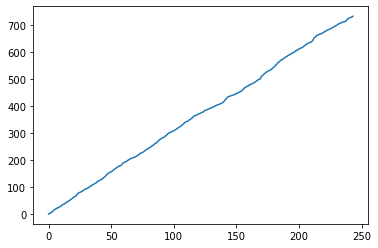

In [3]:
# draw a line chart of the tip column's comulative sum
plt.plot(df_tips["tip"].cumsum())

<BarContainer object of 4 artists>

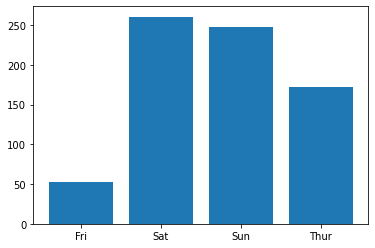

In [4]:
# group the tips by day and draw a bar chart showing tips of each day

groups = df_tips.groupby("day")["tip"].sum() 
plt.bar(groups.index, groups.values)

<BarContainer object of 4 artists>

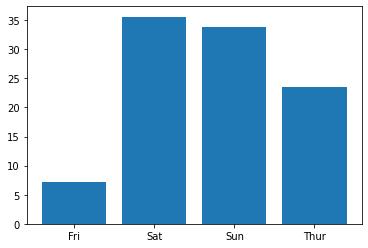

In [5]:
groups = df_tips.groupby("day")["tip"].sum() / df_tips["tip"].sum() * 100
plt.bar(groups.index, groups.values)
# groups

<BarContainer object of 4 artists>

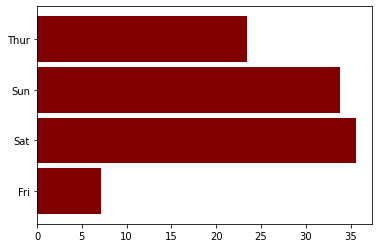

In [6]:
# with the same groups draw a horizontal bar chart, try to change height and color
plt.barh(groups.index, groups.values, height=0.9, color="maroon")


<AxesSubplot:>

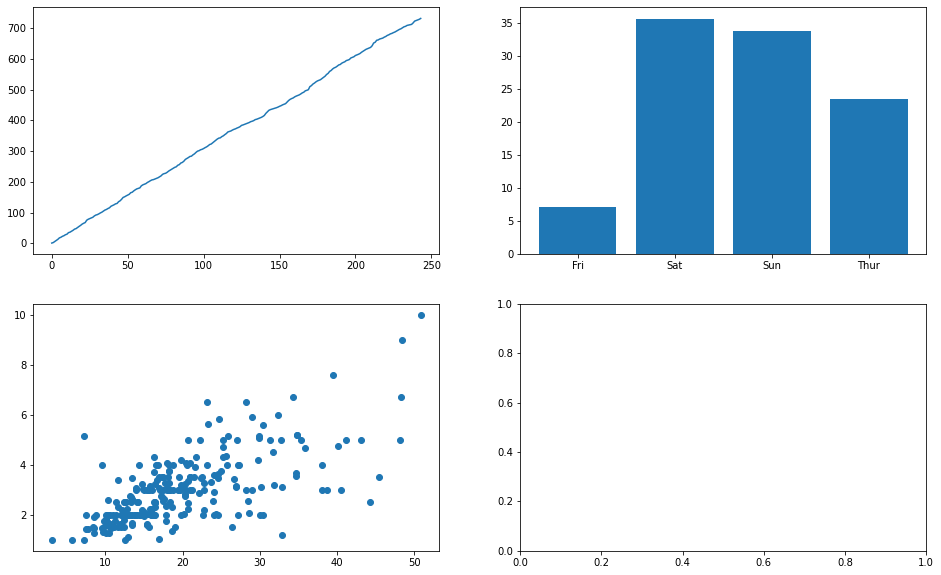

In [7]:
# create 2 * 2 subplot then add the earlier charts to each in a subplot

fig = plt.figure(figsize=(16, 10))

fig.add_subplot(2, 2, 1)
plt.plot(df_tips["tip"].cumsum())

fig.add_subplot(2, 2, 2)
groups = df_tips.groupby("day")["tip"].sum() / df_tips["tip"].sum() * 100
plt.bar(groups.index, groups.values)

fig.add_subplot(2, 2, 3)
plt.scatter(df_tips["total_bill"], df_tips["tip"])

fig.add_subplot(2, 2, 4)



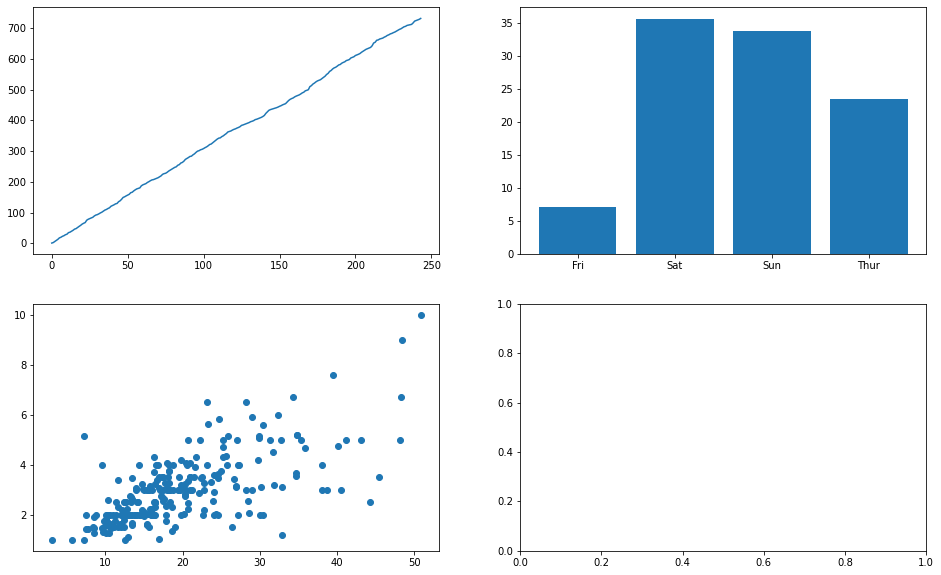

In [8]:
# do the same, using the axises


fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.plot(df_tips["tip"].cumsum())

groups = df_tips.groupby("day")["tip"].sum() / df_tips["tip"].sum() * 100
ax2.bar(groups.index, groups.values)

ax3.scatter(df_tips["total_bill"], df_tips["tip"])


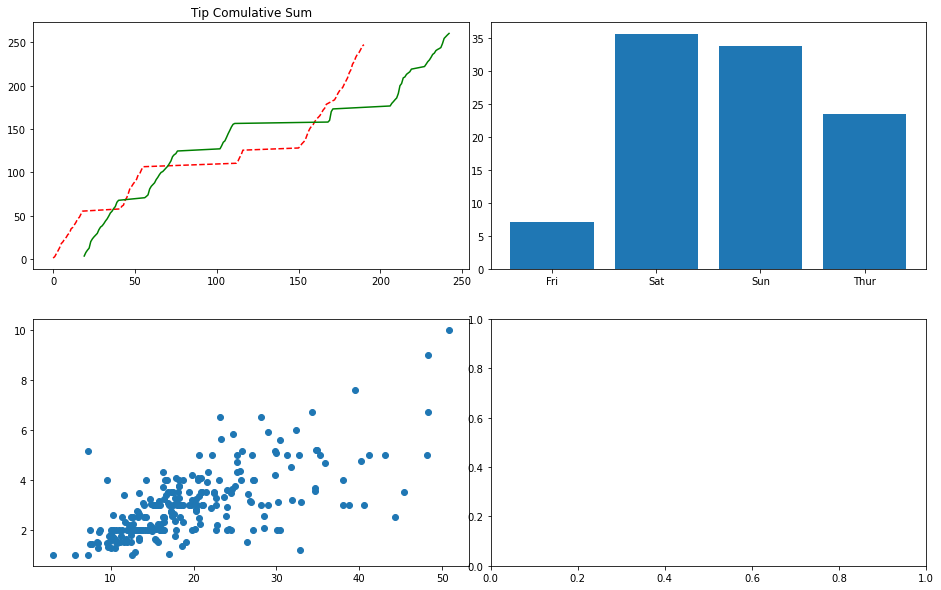

In [9]:
# do the same, but add all subplots at once, then customize line type, title and spaces
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0][0].plot(df_tips.loc[df_tips["day"] == "Sun" , "tip"].cumsum(), color="red", linestyle="--")
axes[0][0].plot(df_tips.loc[df_tips["day"] == "Sat" , "tip"].cumsum(), color="green")
axes[0][0].set_title("Tip Comulative Sum")


groups = df_tips.groupby("day")["tip"].sum() / df_tips["tip"].sum() * 100
axes[0][1].bar(groups.index, groups.values)

axes[1][0].scatter(df_tips["total_bill"], df_tips["tip"])


fig.subplots_adjust(wspace=0.05)

# Analyze USA.gov Data from Bitly

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# read data from 'bitly_usagov.txt' file

data = pd.read_json("bitly_usagov.txt", lines=True)
data.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


## Chart 1
- How many login from each time zone ?

In [12]:
# check if null values exist in 'tz' column
data["tz"].isnull().sum()


120

In [13]:
# check if values of empty string exist in 'tz' column
(data["tz"] == "").sum()

521

In [14]:
# replace nulls and empty strings with 'Unknown' in 'tz' column
data["tz"].replace({np.nan: "Unknown", "": "Unknown"}, inplace=True)


In [15]:
# Test
print(data["tz"].isnull().sum())
print((data["tz"] == "").sum())

0
0


In [16]:
# count the occurances of each value in 'tz' column
tz_data = data.groupby("tz").size().sort_values(ascending=False).head(7)
tz_data

tz
America/New_York       1251
Unknown                 641
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
dtype: int64

![](timezone_freq.png)

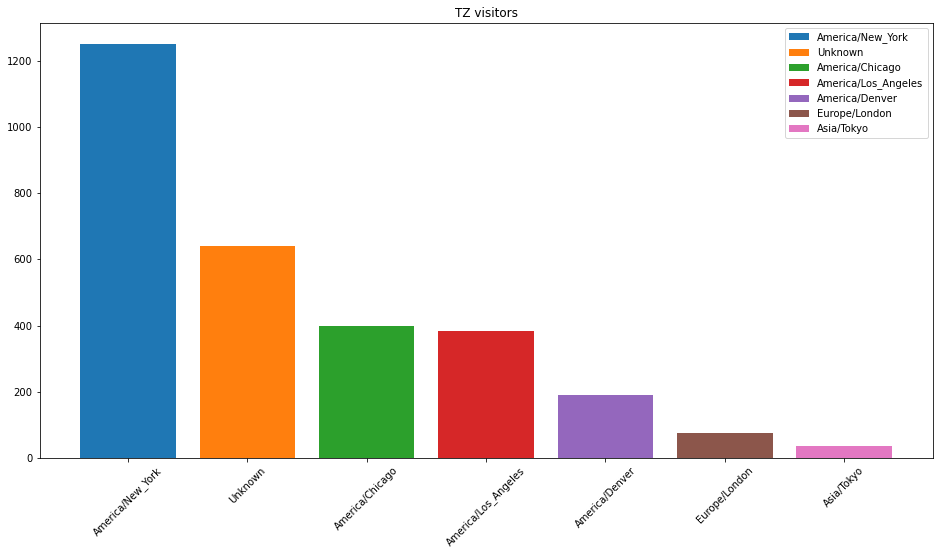

In [17]:
# display a simmilar chart using matplotlib
fig = plt.figure(figsize=(16, 8))
axes = fig.add_subplot(1, 1, 1)

for i in range(tz_data.size):
    axes.bar(tz_data.index[i], tz_data.values[i], label=tz_data.index[i])

axes.set_title("TZ visitors")
plt.xticks(rotation=45)
plt.legend()

![](timezone_freq_h.png)

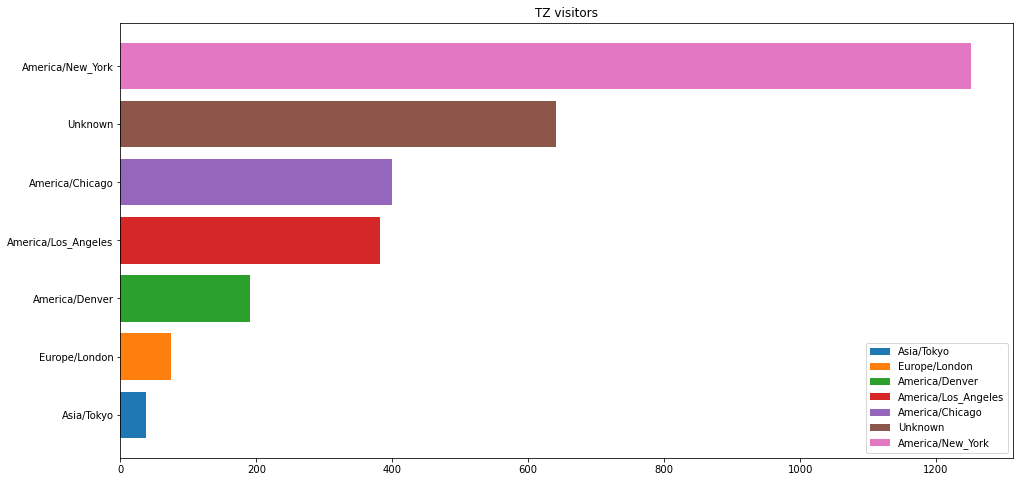

In [18]:
# display a simmilar chart using matplotlib
fig = plt.figure(figsize=(16, 8))
axes = fig.add_subplot(1, 1, 1)

for i in range(-1, -tz_data.size - 1, -1):
    axes.barh(tz_data.index[i], tz_data.values[i], label=tz_data.index[i])

axes.set_title("TZ visitors")

plt.legend()

![](timezone_freq_sns.png)

<AxesSubplot:ylabel='tz'>

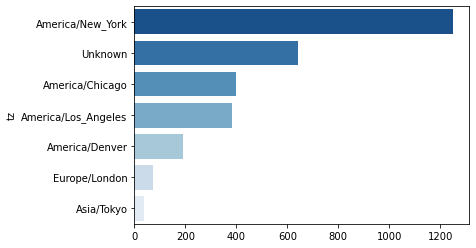

In [19]:
# display a simmilar chart using seaborn
sns.barplot(x=tz_data.values, y=tz_data.index, orient="h", palette="Blues_r")


## Chart 2
- what's the most used OS in each time zone show the top ten?

In [29]:
# check if null values exist in 'a' column
data["a"].isnull().sum()


120

In [30]:
# check if values of empty string exist in 'a' column
mask = data["a"] == ""
data[mask].shape


(0, 18)

In [31]:
# drop rows with nulls or empty strings in 'a' column
data.dropna(subset=["a"], inplace=True)

# recheck
data["a"].isnull().sum()


0

In [32]:
# create a new column 'OS', which has the value of 'Windows' 
# if the word 'windows' exist in the 'a' column and 'Other' otherwise
data["OS"] = data["a"].map(lambda value: "Windows" if "windows" in value.lower() else "Other")
data.head()


,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,OS
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Other
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Other
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows


In [37]:
# show the number of observations for each time zone and OS
groups =  data.groupby(["tz", "OS"]).size().unstack().fillna(0)
groups

OS,Other,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
Pacific/Auckland,3.0,8.0


In [42]:
# sort the time zones descending by total observations then get the top ten
groups["total"] = groups["Other"] + groups["Windows"]
groups = groups.sort_values("total", ascending=False).drop(columns="total").head(10)
groups

OS,Other,Windows
tz,,
America/New_York,339.0,912.0
Unknown,245.0,276.0
America/Chicago,115.0,285.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Europe/London,43.0,31.0
Asia/Tokyo,2.0,35.0
Pacific/Honolulu,0.0,36.0
Europe/Madrid,16.0,19.0


In [47]:
groups = groups.stack().reset_index().rename(columns={0: "Count"})
groups

,tz,OS,Count
0,America/New_York,Other,339.0
1,America/New_York,Windows,912.0
2,Unknown,Other,245.0
3,Unknown,Windows,276.0
4,America/Chicago,Other,115.0
5,America/Chicago,Windows,285.0
6,America/Los_Angeles,Other,130.0
7,America/Los_Angeles,Windows,252.0
8,America/Denver,Other,132.0
9,America/Denver,Windows,59.0


![](timezone_os_freq.png)

<AxesSubplot:xlabel='Count', ylabel='tz'>

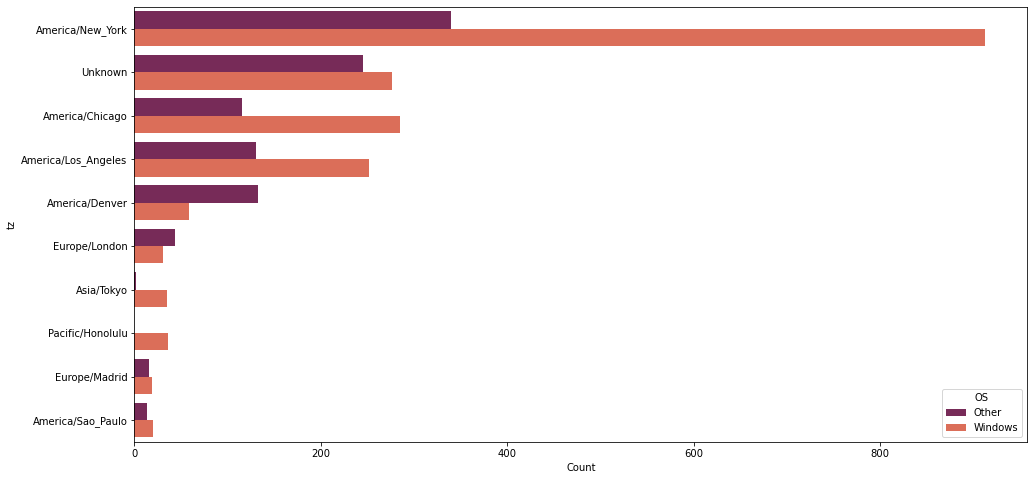

In [56]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 8))
sns.barplot(data=groups, y="tz", x="Count", hue="OS", palette="rocket")

## Chart 3
- What's the percentage of OS in each time zone ?

In [61]:
# calculate the percentage of OS in the time zone
def calc_pct(group):
    group["pct"] = group["Count"] / group["Count"].sum()
    return group

groups = groups.groupby("tz").apply(calc_pct)
groups

,tz,OS,Count,pct
0,America/New_York,Other,339.0,0.270983
1,America/New_York,Windows,912.0,0.729017
2,Unknown,Other,245.0,0.470250
3,Unknown,Windows,276.0,0.529750
4,America/Chicago,Other,115.0,0.287500
5,America/Chicago,Windows,285.0,0.712500
6,America/Los_Angeles,Other,130.0,0.340314
7,America/Los_Angeles,Windows,252.0,0.659686
8,America/Denver,Other,132.0,0.691099
9,America/Denver,Windows,59.0,0.308901


![](timezone_os_freq_normed.png)

<AxesSubplot:xlabel='pct', ylabel='tz'>

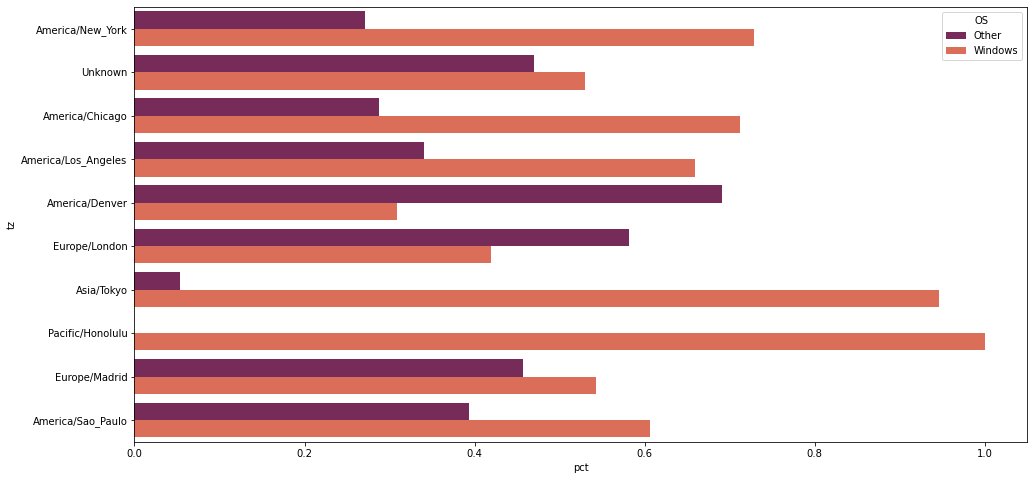

In [62]:
# display a simmilar chart using seaborn
plt.figure(figsize=(16, 8))
sns.barplot(data=groups, y="tz", x="pct", hue="OS", palette="rocket")

## Independent Practice
- explore the data from 'tips.csv'
- state some questions and draw charts to answer them